# Case

In [1]:
import os

%matplotlib notebook 
# %matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

results_dir = 'results'
nbasis_tensors = 1
tinit  = 0
tint   = 0
tfinal = 1000
plot_int = False
savefigs = False

## Load Data

In [2]:
# cost & weights
J = []

for i in range(tfinal+1):
    iJ = np.loadtxt(os.path.join(results_dir, f'J.{i}'))
    J.append(iJ.tolist())

# initial
g_0 = np.squeeze(np.loadtxt(os.path.join(results_dir, f'g.{tinit}')) )
if g_0.ndim==1:
    g_0 = np.expand_dims(g_0, 1)
W_0 = np.loadtxt(os.path.join(results_dir, f'w.{tinit}'))
    
# intermediate
if plot_int:
    g_i = np.squeeze(np.loadtxt(os.path.join(results_dir, f'g.{tint}')) )
    if g_i.ndim==1:
        g_i = np.expand_dims(g_i, 1)
    W_i = np.loadtxt(os.path.join(results_dir, f'w.{tint}'))
    
# final
g_1 = np.squeeze(np.loadtxt(os.path.join(results_dir, f'g.{tfinal}')) )
if g_1.ndim==1:
    g_1 = np.expand_dims(g_1, 1)
W_1 = np.loadtxt(os.path.join(results_dir, f'w.{tfinal}'))
nweights = W_1.shape[0]

# truth
g_t = np.loadtxt(os.path.join(results_dir, 'g_truth'))
if g_t.ndim==1:
    g_t = np.expand_dims(g_t, 1)

# y
y = np.loadtxt(os.path.join(results_dir, 'theta_input'))

print('Done')

Done


# Results

### Cost

<IPython.core.display.Javascript object>


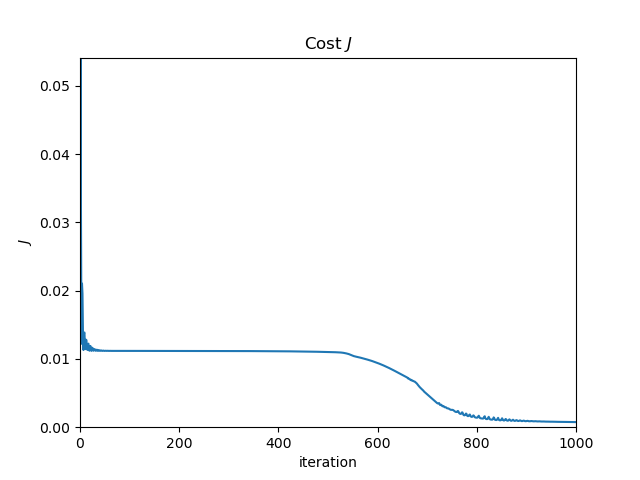

<IPython.core.display.Javascript object>


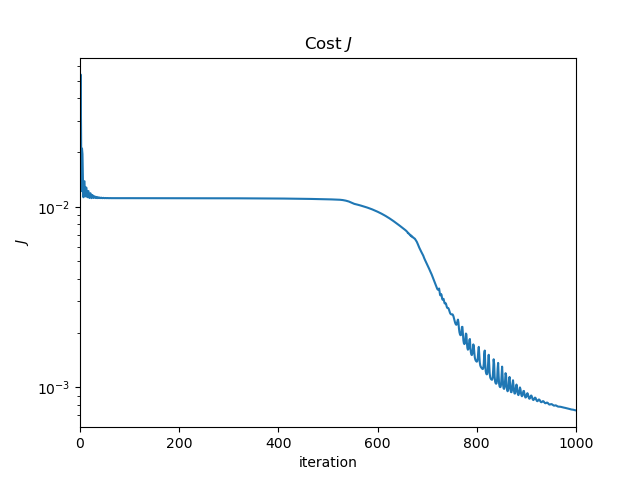

In [3]:
fig, ax = plt.subplots()
ax.plot(J[:tfinal+1], '-')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$J$')
ax.set_title(r'Cost $J$')
ax.set_ylim(0., np.max(J[:tfinal+1]))
ax.set_xlim(0., tfinal)
if savefigs:
    plt.savefig('results_cost.pdf')
    
fig, ax = plt.subplots()
ax.semilogy(J[:tfinal+1], '-')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$J$')
ax.set_title(r'Cost $J$')
ax.set_xlim(0., tfinal)
if savefigs:
    plt.savefig('results_cost_log.pdf')

### functions $g^{(i)}$

<IPython.core.display.Javascript object>


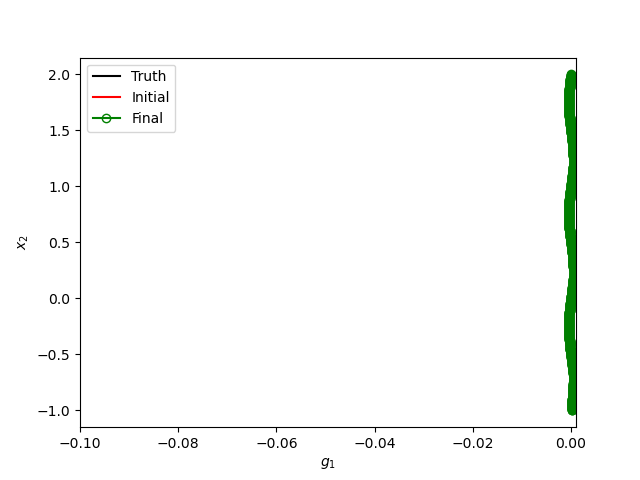

In [5]:
def plotg(ax, i, gt, g0, g1, gi=None):
    ax.plot(gt, y, 'k-', label='Truth')
    ax.plot(g0, y, 'r-', label='Initial')
    if plot_int:
        ax.plot(gi, y, 'c-', label='Intermediate') 
    ax.plot(g1, y, 'g-o', fillstyle='none', label='Final')
    ax.set_xlabel(r'$g_{' f'{i}' r'}$')
    ax.set_ylabel(r'$x_2$')
    ax.set_xlim(np.array([-0.1,0.001])) 
    return ax

if nbasis_tensors==1:
    fig, ax = plt.subplots()
    if plot_int:
        ax = plotg(ax, 1, g_t[:, 0], g_0[:, 0], g_1[:, 0], g_i[:, 0])
    else:
        ax = plotg(ax, 1, g_t[:, 0], g_0[:, 0], g_1[:, 0])
else:
    fig, axs = plt.subplots(nbasis_tensors, 1, figsize=(5, 5*nbasis_tensors))
    plt.suptitle(r'TBNN Coefficients $g^{(i)}$')
    for i in range(nbasis_tensors):
        ax = axs[i]
        if plot_int:
            ax = plotg(ax, i+1, g_t[:, i], g_0[:, i], g_1[:, i], g_i[:, i])
        else:
            ax = plotg(ax, i+1, g_t[:, i], g_0[:, i], g_1[:, i])
plt.legend()
    
if savefigs:
    fig.savefig('results_g.pdf')

### Weights (initial and final values)

In [ ]:
plt.figure()
plt.title(r'Weights $W$')
plt.xlabel(r'Initial Weight')
plt.ylabel(r'Final Weight')

line = [min(np.min(W_0), np.min(W_1)), max(np.max(W_0), np.max(W_1))]
plt.plot(line, [0., 0.], 'k--', alpha=0.5)
plt.plot([0., 0.], line, 'k--', alpha=0.5)

plt.plot(W_0, W_1, 'ko')
plt.plot(line, line, 'y-', alpha=0.5)

if savefigs:
    plt.savefig('results_weights.pdf')